In [5]:
import random 

class Person(object):
    def __init__(self, default_days_sick=5, default_infection_rate = 10):
        self.ID = 0
        self.age = 0
        self.status = "Susceptible"
        self.days_sick = 0
        self.max_days_sick = default_days_sick
        self.infection_rate = default_infection_rate
        self.interactions = []
    
    def get_age(self):
        return self.age
    
    def set_age(self, new_age):
        self.age = new_age
    
    def set_infection_Rate(self, new_rate):
        self.infection_rate = new_rate
        
    def infect(self, number_of_days):
        self.days_sick = number_of_days
        self.status = "Infected"
        
    def recover(self):
        self.days_sick = 0
        self.status = "Recovered"
        
    def roll_for_infection(self):
        if (random.randint(0,101) < self.infection_rate):
            self.infect(self.max_days_sick)
            
    def get_status(self):
        return self.status
    
    def get_days_sick(self):
        return self.days_sick
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):
            self.days_sick = self.days_sick - 1
            if(self.days_sick <= 0):
                self.recover()

In [83]:
class Population(object):
    def __init__(self, number_of_people=1000, default_interactions=10, default_days_sick=5, default_infection_rate=10):
        self.People = []
        self.population_count = number_of_people
        self.number_of_interactions = default_interactions
        self.max_days_sick = default_days_sick
        self.infection_rate = default_infection_rate
        
        ## set Patient_Zero aka The Jerk
        patient_zero = Person()
        patient_zero.infect(self.max_days_sick)
        
        ## add patient_zero to our People[]
        
        self.People.append(patient_zero)
        
        ## build the rest of our Population      
        for i in range(0, self.population_count):
            new_person = Person()
            
            ##Aleatorio para ver si usa mascarilla
        ##  if(random.randint(0,10)  > 5):
        ##        new_person.set_infection_Rate(1)
        ##    self.People.append(new_person)
            
            ##Aleatorio para la edad
            age = random.randint(0,80)
            new_person.set_age(age)
            
            ##edad entre 1 y 5
            if (age < 5):
                new_person.set_infection_Rate(3)
            ##edad entre 6 y 18
            elif (age >= 5 and age < 18): 
                new_person.set_infection_Rate(10)
            ##edad entre 19 y 80
            else: 
                new_person.set_infection_Rate(30)
                
            self.People.append(new_person)
                                   
    
    ##Cuenta el número de niños en la población
    def number_of_Childs_Infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_age() < 5 and the_person.get_status() == "Infected"):
                count = count + 1
        return count
  
    ##Cuenta el número de jovenes en la población
    def number_of_Youngers_Infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_age() >= 5 and the_person.get_age() < 18 and the_person.get_status() == "Infected"):
                count = count + 1
        return count
    
    ##Cuenta el número de ancianos en la población
    def number_of_Adults_Infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_age() >= 18 and the_person.get_status() == "Infected"):
                count = count + 1
        return count
    
    ##go through our population, and count each person that's susceptible
    def number_of_susceptible(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Susceptible"):
                count = count + 1
        
        return count
    
    ##go through the population, and count each person that's infected
    def number_of_infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Infected"):
                count = count + 1
        
        return count
    
    ##go through the population, and count each person that's recovered
    def number_of_recovered(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Recovered"):
                count = count + 1
                
        return count
    
    ##Total Population
    def get_population_count(self):
        return self.People.count()
    
    
    def update(self):
        
        ##we're going to make a list of People who might get
        ##infected at the end of the day
        
        might_get_sick = []
        
        ## go through my Population and see who might get sick
        for person in self.People:
            person.interactions = []
            
            ## each person inteteracts w/ number_of_interaction number of people
            
            for i in range(0, self.number_of_interactions):
                r = random.randint(0, self.population_count)
                person.interactions.append(r)
            
            ## if person is infected, their interactions might get infected
            if (person.get_status() == "Infected"):
                ##????? really????
                person.update()
                
                for j in person.interactions:
                    if (self.People[j].get_status() == "Susceptible"):
                        might_get_sick.append(self.People[j])
            
            ## if person is susceptible, they interact w/ someone infected
            if (person.get_status() == "Susceptible"):
                for j in person.interactions:
                    if (self.People[j].get_status() == "Infected"):
                        might_get_sick.append(person)
                        
        ##the above updates each person who is infected
        ##I have a list of people who **might** get infected
        ##each person in that list, has to roll to get infected
        
        for person in might_get_sick:
            person.roll_for_infection()

day: 0 infected: 1 recovered: 0
---------------------------
Cantidad de Niños Infectados:  1
Cantidad de Jóvenes Infectados:  0
Cantidad de Adultos Infectados:  0
---------------------------



day: 1 infected: 8 recovered: 0
---------------------------
Cantidad de Niños Infectados:  1
Cantidad de Jóvenes Infectados:  0
Cantidad de Adultos Infectados:  7
---------------------------



day: 2 infected: 58 recovered: 0
---------------------------
Cantidad de Niños Infectados:  2
Cantidad de Jóvenes Infectados:  3
Cantidad de Adultos Infectados:  53
---------------------------



day: 3 infected: 374 recovered: 0
---------------------------
Cantidad de Niños Infectados:  4
Cantidad de Jóvenes Infectados:  26
Cantidad de Adultos Infectados:  344
---------------------------



day: 4 infected: 2109 recovered: 0
---------------------------
Cantidad de Niños Infectados:  16
Cantidad de Jóvenes Infectados:  155
Cantidad de Adultos Infectados:  1938
---------------------------



day: 5 infecte

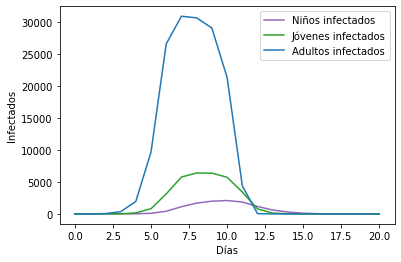

In [84]:
##Build our Community

myCommunity = Population(40000)
day = 0
number_infected = myCommunity.number_of_infected()
matrix_by_day = []



while (number_infected > 0):
    number_infected = myCommunity.number_of_infected()
    number_recovered = myCommunity.number_of_recovered()
    print("day:", day, "infected:", number_infected, "recovered:", number_recovered)
    
    print("---------------------------")
    print("Cantidad de Niños Infectados: ", myCommunity.number_of_Childs_Infected())
    print("Cantidad de Jóvenes Infectados: ", myCommunity.number_of_Youngers_Infected())
    print("Cantidad de Adultos Infectados: ", myCommunity.number_of_Adults_Infected())
    print("---------------------------")
    print("")
    print("")
    print("")
    
    matrix_by_day.append([day, myCommunity.number_of_Childs_Infected(), myCommunity.number_of_Youngers_Infected(), myCommunity.number_of_Adults_Infected()])
  
    day = day + 1
    myCommunity.update()
    

print("day:", day, "infected:", myCommunity.number_of_infected(), "recovered:", myCommunity.number_of_recovered())

dias = []
niños_Infectados= []
jóvenes_Infectados = []
adultos_Infectados = []

for i in matrix_by_day:
    dias.append(i[0])
    niños_Infectados.append(i[1])
    jóvenes_Infectados.append(i[2])
    adultos_Infectados.append(i[3])

print("")
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(dias, niños_Infectados, color = 'tab:purple', label = 'Niños infectados')
ax.plot(dias, jóvenes_Infectados, color = 'tab:green', label = 'Jóvenes infectados')
ax.plot(dias, adultos_Infectados, color = 'tab:blue', label = 'Adultos infectados')
ax.set_xlabel("Días")
ax.set_ylabel("Infectados")
ax.legend(loc = 'upper right')
plt.show()
